In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from skimage.draw import line_aa

from src.draw import *
from src.simulation import Simulation
from src.measure import Measure

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
filters = [[[0,0],[1,1]],
           [[1,0],[0,1]], 
           [[0,1],[0,1]], 
           [[0,1],[1,0]]]

def get_dissimilarity(img, filters, inds_sync):
    sim = Simulation(img, filters, 1, 0, 0)
    voltage, recovery, firings = sim.run(1000)
    
    measure = Measure(firings[inds_sync], 'victor_purpura')
    return measure.dissimilarity()

In [3]:
width = 28
height = 28
strength = 1
length = 3

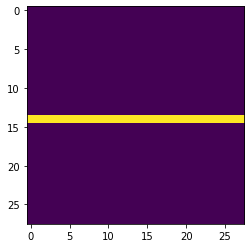

In [4]:
img1 = np.zeros(shape=(height,width))

middle_height, middle_width = height // 2, width // 2

#left horizontal line
rr_left_1, cc_left_1 = draw.line_nd((middle_height, 0), (middle_height, middle_width))  
img1[rr_left_1, cc_left_1] = strength

#right horizontal line
rr_right_1, cc_right_1 = draw.line_nd((middle_height, middle_width), (middle_height, width))  
img1[rr_right_1, cc_right_1] = strength

plt.imshow(img1)
plt.show()

In [9]:
vr1 = []
vp1 = []
contrast1 = []
rsync1 = []

for i in range(100):
    print('\nSIMULATION', i)
    sim1 = Simulation(stimulus=img1, filters=filters, total_connect_strength=0.13)
    voltage1, recovery1, firings1 = sim1.run(length=1000, verbose=True)

    img1_coord1 = (rr_left_1[-12]+1) * width + cc_left_1[-12]
    img1_coord2 = (rr_left_1[-4]+1) * width + cc_left_1[-4]
    img1_coord3 = (rr_right_1[4]+1) * width + cc_right_1[4]
    
    vp1_12 = Measure([firings1[img1_coord1], firings1[img1_coord2]], 'victor_purpura').dissimilarity()['mean']
    vp1_23 = Measure([firings1[img1_coord2], firings1[img1_coord3]], 'victor_purpura').dissimilarity()['mean']
    vp1.append(vp1_23 - vp1_12)
    print('victor_purpura', vp1_12, vp1_23)

    vr1_12 = Measure([firings1[img1_coord1], firings1[img1_coord2]], 'van_rossum').dissimilarity()['mean']
    vr1_23 = Measure([firings1[img1_coord2], firings1[img1_coord3]], 'van_rossum').dissimilarity()['mean']
    vr1.append(vr1_23 - vr1_12)
    print('van_rossum', vr1_12, vr1_23)
    
    contrast1_12 = Measure([firings1[img1_coord1], firings1[img1_coord2]], 'spike_contrast').dissimilarity()
    contrast1_23 = Measure([firings1[img1_coord2], firings1[img1_coord3]], 'spike_contrast').dissimilarity()
    contrast1.append(contrast1_23 - contrast1_12)
    print('contrast', contrast1_12, contrast1_23)
    
    rsync1_12 = Measure(firings1[[img1_coord1, img1_coord2]], 'rsync').dissimilarity()
    rsync1_23 = Measure(firings1[[img1_coord3, img1_coord2]], 'rsync').dissimilarity()
    rsync1.append(rsync1_23 - rsync1_12)
    print('rsync', rsync1_12, rsync1_23)
    
print('\nRESULTS')
print('victor purpura', np.mean(vp1), np.median(vp1))
print('van_rossum', np.mean(vr1), np.median(vr1))
print('contrast', np.mean(contrast1), np.median(contrast1))
print('rsync', np.mean(rsync1), np.median(rsync1))


SIMULATION 0
Simulated 100 ms of braintime in 0.09197580000000016 s of computer time.
Simulated 200 ms of braintime in 0.1745243999999957 s of computer time.
Simulated 300 ms of braintime in 0.24685820000001968 s of computer time.
Simulated 400 ms of braintime in 0.3214320000000157 s of computer time.
Simulated 500 ms of braintime in 0.39261970000001156 s of computer time.
Simulated 600 ms of braintime in 0.49245970000004036 s of computer time.
Simulated 700 ms of braintime in 0.5830859000000146 s of computer time.
Simulated 800 ms of braintime in 0.6540947999999958 s of computer time.
Simulated 900 ms of braintime in 0.743473100000017 s of computer time.
Simulation took 0.8423253000000273 s
victor_purpura 16.15500000000003 0.3640000000000072
van_rossum 13.786049966783379 0.7925568304693286
contrast 0.5693359375 0.6920572916666666
rsync 0.515527950310559 0.5122950819672132

SIMULATION 1
Simulated 100 ms of braintime in 0.07575830000001815 s of computer time.
Simulated 200 ms of braint

Simulated 400 ms of braintime in 0.30317480000002206 s of computer time.
Simulated 500 ms of braintime in 0.3790051999999946 s of computer time.
Simulated 600 ms of braintime in 0.4433619000000135 s of computer time.
Simulated 700 ms of braintime in 0.5116977000000134 s of computer time.
Simulated 800 ms of braintime in 0.5892654000000448 s of computer time.
Simulated 900 ms of braintime in 0.6600745000000074 s of computer time.
Simulation took 0.7287262000000396 s
victor_purpura 5.219999999999999 2.2150000000000016
van_rossum 4.506789956646978 1.958627513266121
contrast 0.6064139941690962 0.539859693877551
rsync 0.4915039655136334 0.5143854492008082

SIMULATION 10
Simulated 100 ms of braintime in 0.070933000000025 s of computer time.
Simulated 200 ms of braintime in 0.1323188000000073 s of computer time.
Simulated 300 ms of braintime in 0.21343290000004345 s of computer time.
Simulated 400 ms of braintime in 0.2813960000000293 s of computer time.
Simulated 500 ms of braintime in 0.361

Simulated 700 ms of braintime in 0.5633020000000215 s of computer time.
Simulated 800 ms of braintime in 0.628433100000052 s of computer time.
Simulated 900 ms of braintime in 0.6850270000000478 s of computer time.
Simulation took 0.7409471000000281 s
victor_purpura 0.35800000000000054 5.223000000000001
van_rossum 0.7870977088376614 4.344744698029323
contrast 0.6745867768595042 0.5991253644314869
rsync 0.5112474437627812 0.47057777219745955

SIMULATION 19
Simulated 100 ms of braintime in 0.07265100000000757 s of computer time.
Simulated 200 ms of braintime in 0.14651370000001407 s of computer time.
Simulated 300 ms of braintime in 0.21101279999999178 s of computer time.
Simulated 400 ms of braintime in 0.2743127999999615 s of computer time.
Simulated 500 ms of braintime in 0.34446159999998827 s of computer time.
Simulated 600 ms of braintime in 0.4021437999999762 s of computer time.
Simulated 700 ms of braintime in 0.4587276999999972 s of computer time.
Simulated 800 ms of braintime in

Simulation took 0.8503600000000233 s
victor_purpura 13.212000000000009 4.244000000000003
van_rossum 11.15722343676527 3.408437134117184
contrast 0.6634401777213583 0.6514423076923077
rsync 0.5022243931765237 0.4737756714060031

SIMULATION 28
Simulated 100 ms of braintime in 0.07307040000000598 s of computer time.
Simulated 200 ms of braintime in 0.14678320000001577 s of computer time.
Simulated 300 ms of braintime in 0.24586319999997386 s of computer time.
Simulated 400 ms of braintime in 0.3566534999999931 s of computer time.
Simulated 500 ms of braintime in 0.4379807999999912 s of computer time.
Simulated 600 ms of braintime in 0.5158278999999766 s of computer time.
Simulated 700 ms of braintime in 0.5940102000000138 s of computer time.
Simulated 800 ms of braintime in 0.6712117000000148 s of computer time.
Simulated 900 ms of braintime in 0.738167599999997 s of computer time.
Simulation took 0.8041400999999837 s
victor_purpura 3.248000000000011 7.244000000000006
van_rossum 2.7061180

Simulated 100 ms of braintime in 0.07698899999996911 s of computer time.
Simulated 200 ms of braintime in 0.15019059999997353 s of computer time.
Simulated 300 ms of braintime in 0.22554719999999406 s of computer time.
Simulated 400 ms of braintime in 0.3121138000000201 s of computer time.
Simulated 500 ms of braintime in 0.38923340000002327 s of computer time.
Simulated 600 ms of braintime in 0.45689959999998564 s of computer time.
Simulated 700 ms of braintime in 0.5263911000000121 s of computer time.
Simulated 800 ms of braintime in 0.6000513000000183 s of computer time.
Simulated 900 ms of braintime in 0.6640833999999813 s of computer time.
Simulation took 0.7280501999999842 s
victor_purpura 15.157000000000009 3.2200000000000024
van_rossum 12.963129578251596 2.6887901346844094
contrast 0.6444504165546896 0.5453977509371096
rsync 0.5148067833364391 0.4915890783554766

SIMULATION 38
Simulated 100 ms of braintime in 0.09158039999999801 s of computer time.
Simulated 200 ms of braintime

Simulated 400 ms of braintime in 0.3705276000000026 s of computer time.
Simulated 500 ms of braintime in 0.4976614000000268 s of computer time.
Simulated 600 ms of braintime in 0.6130099000000087 s of computer time.
Simulated 700 ms of braintime in 0.69543299999998 s of computer time.
Simulated 800 ms of braintime in 0.7872487999999862 s of computer time.
Simulated 900 ms of braintime in 0.8848765999999841 s of computer time.
Simulation took 0.9529797000000144 s
victor_purpura 5.218000000000005 4.23200000000001
van_rossum 4.318489876603262 3.452785028151829
contrast 0.5879501385041552 0.5599489795918366
rsync 0.5145584596210466 0.5143319123915919

SIMULATION 47
Simulated 100 ms of braintime in 0.08855169999998225 s of computer time.
Simulated 200 ms of braintime in 0.17102629999999408 s of computer time.
Simulated 300 ms of braintime in 0.23980949999997847 s of computer time.
Simulated 400 ms of braintime in 0.30772659999996677 s of computer time.
Simulated 500 ms of braintime in 0.377

Simulated 800 ms of braintime in 0.5711820999999873 s of computer time.
Simulated 900 ms of braintime in 0.6340754000000288 s of computer time.
Simulation took 0.6954400000000192 s
victor_purpura 12.142 3.2690000000000077
van_rossum 10.358883050373068 2.6759355939684437
contrast 0.578125 0.6070620190131282
rsync 0.49536423841059607 0.511984920790569

SIMULATION 56
Simulated 100 ms of braintime in 0.10598420000002307 s of computer time.
Simulated 200 ms of braintime in 0.19940819999999349 s of computer time.
Simulated 300 ms of braintime in 0.29080929999997807 s of computer time.
Simulated 400 ms of braintime in 0.365998999999988 s of computer time.
Simulated 500 ms of braintime in 0.4354769999999917 s of computer time.
Simulated 600 ms of braintime in 0.5066549000000009 s of computer time.
Simulated 700 ms of braintime in 0.5725740999999971 s of computer time.
Simulated 800 ms of braintime in 0.6320036999999843 s of computer time.
Simulated 900 ms of braintime in 0.6953290000000152 s o

Simulated 100 ms of braintime in 0.10045690000004015 s of computer time.
Simulated 200 ms of braintime in 0.18370680000003858 s of computer time.
Simulated 300 ms of braintime in 0.2642787999999996 s of computer time.
Simulated 400 ms of braintime in 0.35027180000003 s of computer time.
Simulated 500 ms of braintime in 0.42910249999999905 s of computer time.
Simulated 600 ms of braintime in 0.5048896000000127 s of computer time.
Simulated 700 ms of braintime in 0.5760233000000312 s of computer time.
Simulated 800 ms of braintime in 0.642436000000032 s of computer time.
Simulated 900 ms of braintime in 0.7107652999999914 s of computer time.
Simulation took 0.7785005000000069 s
victor_purpura 4.1940000000000115 3.1950000000000065
van_rossum 3.547042099755146 2.721203483217496
contrast 0.45833333333333326 0.4144106622240734
rsync 0.46951323654995747 0.4915890783554767

SIMULATION 66
Simulated 100 ms of braintime in 0.10875799999996616 s of computer time.
Simulated 200 ms of braintime in 0

Simulated 400 ms of braintime in 0.3469237999999564 s of computer time.
Simulated 500 ms of braintime in 0.43321429999997463 s of computer time.
Simulated 600 ms of braintime in 0.5049399999999764 s of computer time.
Simulated 700 ms of braintime in 0.5772236999999905 s of computer time.
Simulated 800 ms of braintime in 0.6573814999999854 s of computer time.
Simulated 900 ms of braintime in 0.7268670999999927 s of computer time.
Simulation took 0.7948743000000036 s
victor_purpura 8.180000000000001 8.224
van_rossum 6.817027294419859 6.888670264732254
contrast 0.5113168724279835 0.5897633744855967
rsync 0.49453437440487524 0.5135783660255189

SIMULATION 75
Simulated 100 ms of braintime in 0.0943161999999802 s of computer time.
Simulated 200 ms of braintime in 0.17387689999998202 s of computer time.
Simulated 300 ms of braintime in 0.24727759999996124 s of computer time.
Simulated 400 ms of braintime in 0.3296290999999769 s of computer time.
Simulated 500 ms of braintime in 0.408425200000

Simulated 800 ms of braintime in 1.1176722000000154 s of computer time.
Simulated 900 ms of braintime in 1.2142205000000104 s of computer time.
Simulation took 1.4135362999999757 s
victor_purpura 7.203999999999997 6.195000000000006
van_rossum 6.072376610201953 5.266171844764004
contrast 0.542483660130719 0.5444
rsync 0.5128434826371416 0.5126405647213332

SIMULATION 84
Simulated 100 ms of braintime in 0.19821960000001582 s of computer time.
Simulated 200 ms of braintime in 0.37128400000000283 s of computer time.
Simulated 300 ms of braintime in 0.4857159000000024 s of computer time.
Simulated 400 ms of braintime in 0.595933700000046 s of computer time.
Simulated 500 ms of braintime in 0.6901708999999983 s of computer time.
Simulated 600 ms of braintime in 0.7786935999999969 s of computer time.
Simulated 700 ms of braintime in 0.9253007000000366 s of computer time.
Simulated 800 ms of braintime in 1.023883699999999 s of computer time.
Simulated 900 ms of braintime in 1.1669853000000217 

Simulated 100 ms of braintime in 0.07567160000002104 s of computer time.
Simulated 200 ms of braintime in 0.14156090000000177 s of computer time.
Simulated 300 ms of braintime in 0.20856370000001334 s of computer time.
Simulated 400 ms of braintime in 0.2762038999999845 s of computer time.
Simulated 500 ms of braintime in 0.35361419999998134 s of computer time.
Simulated 600 ms of braintime in 0.41888160000002017 s of computer time.
Simulated 700 ms of braintime in 0.48823379999998906 s of computer time.
Simulated 800 ms of braintime in 0.5497444000000087 s of computer time.
Simulated 900 ms of braintime in 0.6192834999999945 s of computer time.
Simulation took 0.6866021999999816 s
victor_purpura 5.228999999999999 15.162000000000003
van_rossum 4.337838443210862 12.743999260021509
contrast 0.6491625169760074 0.6714373653431825
rsync 0.46831070331059443 0.4774894594936938

SIMULATION 94
Simulated 100 ms of braintime in 0.08651100000002998 s of computer time.
Simulated 200 ms of braintime

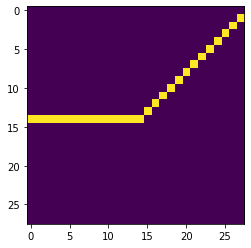

In [10]:
img2 = np.zeros(shape=(height,width))

#left horizontal line
rr_left_2, cc_left_2 = draw.line_nd((middle_height, 0), (middle_height, middle_width))  
img2[rr_left_2, cc_left_2] = strength

#right horizontal line
rr_right_2, cc_right_2 = draw.line_nd((middle_height, middle_width), (0, width))  
img2[rr_right_2, cc_right_2] = strength

plt.imshow(img2)
plt.show()

In [18]:
vr2 = []
vp2 = []
contrast2 = []
rsync2 = []

for i in range(100):
    print('\nSIMULATION', i)
    sim2 = Simulation(stimulus=img2, filters=filters, total_connect_strength=0.13)
    voltage2, recovery2, firings2 = sim2.run(length=1000, verbose=True)

    img2_coord1 = (rr_left_2[-12]+1) * width + cc_left_2[-12]
    img2_coord2 = (rr_left_2[-4]+1) * width + cc_left_2[-4]
    img2_coord3 = (rr_right_2[4]+1) * width + cc_right_2[4] + width*height*3
    
    vp2_12 = Measure([firings2[img2_coord1], firings2[img2_coord2]], 'victor_purpura').dissimilarity()['mean']
    vp2_23 = Measure([firings2[img2_coord2], firings2[img2_coord3]], 'victor_purpura').dissimilarity()['mean']
    vp2.append(vp2_23 - vp2_12)
    print('victor_purpura', vp2_12, vp2_23)

    vr2_12 = Measure([firings2[img2_coord1], firings2[img2_coord2]], 'van_rossum').dissimilarity()['mean']
    vr2_23 = Measure([firings2[img2_coord2], firings2[img2_coord3]], 'van_rossum').dissimilarity()['mean']
    vr2.append(vr2_23 - vr2_12)
    print('van_rossum', vr2_12, vr2_23)
    
    contrast2_12 = Measure([firings2[img2_coord1], firings2[img2_coord2]], 'spike_contrast').dissimilarity()
    contrast2_23 = Measure([firings2[img2_coord2], firings2[img2_coord3]], 'spike_contrast').dissimilarity()
    contrast2.append(contrast2_23 - contrast2_12)
    print('contrast', contrast2_12, contrast2_23)
    
    rsync2_12 = Measure([firings2[img2_coord1], firings2[img2_coord2]], 'rsync').dissimilarity()
    rsync2_23 = Measure([firings2[img2_coord2], firings2[img2_coord3]], 'rsync').dissimilarity()
    rsync2.append(rsync2_23 - rsync2_12)
    print('rsync', rsync2_12, rsync2_23)
    
print('\nRESULTS')
print('victor purpura', np.mean(vp2), np.median(vp2))
print('van_rossum', np.mean(vr2), np.median(vr2))
print('contrast', np.mean(contrast2), np.median(contrast2))
print('rsync', np.mean(rsync2), np.median(rsync2))


SIMULATION 0
Simulated 100 ms of braintime in 0.0841146000000208 s of computer time.
Simulated 200 ms of braintime in 0.15863560000002508 s of computer time.
Simulated 300 ms of braintime in 0.23911459999999352 s of computer time.
Simulated 400 ms of braintime in 0.3233647000001838 s of computer time.
Simulated 500 ms of braintime in 0.4048133000001144 s of computer time.
Simulated 600 ms of braintime in 0.4916365000001406 s of computer time.
Simulated 700 ms of braintime in 0.5969278000000031 s of computer time.
Simulated 800 ms of braintime in 0.7089390000001004 s of computer time.
Simulated 900 ms of braintime in 0.9026899000000412 s of computer time.
Simulation took 1.508779800000184 s
victor_purpura 15.174000000000003 4.219000000000005
van_rossum 12.832538954469552 3.6115284039626325
contrast 0.6625907014243483 0.595
rsync 0.5148067833364391 0.5127405522957614

SIMULATION 1
Simulated 100 ms of braintime in 0.16658490000008896 s of computer time.
Simulated 200 ms of braintime in 0

Simulated 400 ms of braintime in 0.41108890000009524 s of computer time.
Simulated 500 ms of braintime in 0.623942100000022 s of computer time.
Simulated 600 ms of braintime in 0.7353441000000203 s of computer time.
Simulated 700 ms of braintime in 0.8261878000000706 s of computer time.
Simulated 800 ms of braintime in 0.9176188000001275 s of computer time.
Simulated 900 ms of braintime in 1.0069023000000925 s of computer time.
Simulation took 1.0945730000000822 s
victor_purpura 13.160000000000009 16.153000000000006
van_rossum 11.14346343113193 13.698342647457375
contrast 0.6189216427311666 0.6253472222222223
rsync 0.4991793996487829 0.4799559167929466

SIMULATION 10
Simulated 100 ms of braintime in 0.11067350000007536 s of computer time.
Simulated 200 ms of braintime in 0.20053150000012465 s of computer time.
Simulated 300 ms of braintime in 0.29726610000011533 s of computer time.
Simulated 400 ms of braintime in 0.3894467000000077 s of computer time.
Simulated 500 ms of braintime in 

Simulated 700 ms of braintime in 0.646564299999909 s of computer time.
Simulated 800 ms of braintime in 0.7362839999998414 s of computer time.
Simulated 900 ms of braintime in 0.8215606999999636 s of computer time.
Simulation took 0.9084184999999252 s
victor_purpura 1.4230000000000071 3.1950000000000074
van_rossum 1.385234419180277 2.735450814138094
contrast 0.6841599384851981 0.49483802064791726
rsync 0.513078733978551 0.494185032273071

SIMULATION 19
Simulated 100 ms of braintime in 0.10226059999990866 s of computer time.
Simulated 200 ms of braintime in 0.19755880000002435 s of computer time.
Simulated 300 ms of braintime in 0.29355600000008053 s of computer time.
Simulated 400 ms of braintime in 0.3949847999999747 s of computer time.
Simulated 500 ms of braintime in 0.4900195000000167 s of computer time.
Simulated 600 ms of braintime in 0.5760416000000532 s of computer time.
Simulated 700 ms of braintime in 0.6755737999999383 s of computer time.
Simulated 800 ms of braintime in 0.7

Simulation took 0.9743452000000161 s
victor_purpura 5.2380000000000155 6.239000000000002
van_rossum 4.34020260925906 5.251692290312368
contrast 0.597667638483965 0.6288
rsync 0.5124301588298074 0.5126405647213331

SIMULATION 28
Simulated 100 ms of braintime in 0.11059039999986453 s of computer time.
Simulated 200 ms of braintime in 0.21237429999996493 s of computer time.
Simulated 300 ms of braintime in 0.3092874999999822 s of computer time.
Simulated 400 ms of braintime in 0.407436799999914 s of computer time.
Simulated 500 ms of braintime in 0.5103530999999748 s of computer time.
Simulated 600 ms of braintime in 0.6168821999999636 s of computer time.
Simulated 700 ms of braintime in 0.7169662999999673 s of computer time.
Simulated 800 ms of braintime in 0.8209163999999873 s of computer time.
Simulated 900 ms of braintime in 0.9177491999998892 s of computer time.
Simulation took 1.0201196000000436 s
victor_purpura 11.157999999999998 12.166000000000004
van_rossum 9.579288624714728 10.3

Simulated 100 ms of braintime in 0.09984030000009625 s of computer time.
Simulated 200 ms of braintime in 0.1934504000000743 s of computer time.
Simulated 300 ms of braintime in 0.2917322000000695 s of computer time.
Simulated 400 ms of braintime in 0.40522970000006353 s of computer time.
Simulated 500 ms of braintime in 0.5001325000000634 s of computer time.
Simulated 600 ms of braintime in 0.5934313000000202 s of computer time.
Simulated 700 ms of braintime in 0.6822936000000936 s of computer time.
Simulated 800 ms of braintime in 0.7726156999999603 s of computer time.
Simulated 900 ms of braintime in 0.8658589000001484 s of computer time.
Simulation took 0.9544593000000532 s
victor_purpura 8.214000000000002 8.201000000000008
van_rossum 6.831450497335608 6.806691059437774
contrast 0.6262943786982249 0.6285133136094674
rsync 0.453769559032717 0.5130393551446183

SIMULATION 38
Simulated 100 ms of braintime in 0.09713209999995343 s of computer time.
Simulated 200 ms of braintime in 0.19

Simulated 400 ms of braintime in 0.3993593000000146 s of computer time.
Simulated 500 ms of braintime in 0.49490670000000136 s of computer time.
Simulated 600 ms of braintime in 0.582345499999974 s of computer time.
Simulated 700 ms of braintime in 0.6723331999999118 s of computer time.
Simulated 800 ms of braintime in 0.7640406999998959 s of computer time.
Simulated 900 ms of braintime in 0.8573375999999371 s of computer time.
Simulation took 0.9492058999999244 s
victor_purpura 2.2910000000000044 3.2370000000000068
van_rossum 1.8076790646449923 2.6383673690996217
contrast 0.5822306238185255 0.534320987654321
rsync 0.5117489986648867 0.48872291567196413

SIMULATION 47
Simulated 100 ms of braintime in 0.10296040000002904 s of computer time.
Simulated 200 ms of braintime in 0.2006252000001041 s of computer time.
Simulated 300 ms of braintime in 0.31294910000019627 s of computer time.
Simulated 400 ms of braintime in 0.42230940000013106 s of computer time.
Simulated 500 ms of braintime in

Simulated 700 ms of braintime in 0.6894290999998702 s of computer time.
Simulated 800 ms of braintime in 0.779473299999836 s of computer time.
Simulated 900 ms of braintime in 0.8734611999998378 s of computer time.
Simulation took 0.9640537999998742 s
victor_purpura 3.1850000000000014 1.3149999999999993
van_rossum 2.707770655927098 1.067566513253723
contrast 0.4302374010828822 0.5733333333333335
rsync 0.4915890783554766 0.4660354195557779

SIMULATION 56
Simulated 100 ms of braintime in 0.19095900000002075 s of computer time.
Simulated 200 ms of braintime in 0.2869903000000704 s of computer time.
Simulated 300 ms of braintime in 0.3854876000000331 s of computer time.
Simulated 400 ms of braintime in 0.4790084000001116 s of computer time.
Simulated 500 ms of braintime in 0.569776900000079 s of computer time.
Simulated 600 ms of braintime in 0.6639537000000928 s of computer time.
Simulated 700 ms of braintime in 0.7514429000000291 s of computer time.
Simulated 800 ms of braintime in 0.851

Simulation took 0.9424679999999626 s
victor_purpura 0.14600000000000213 4.205000000000006
van_rossum 0.531937966534014 3.5079343860801866
contrast 0.2975206611570248 0.5247395833333333
rsync 0.48800892359174575 0.512211784799317

SIMULATION 65
Simulated 100 ms of braintime in 0.10511070000006839 s of computer time.
Simulated 200 ms of braintime in 0.2642157000000225 s of computer time.
Simulated 300 ms of braintime in 0.3956332000000202 s of computer time.
Simulated 400 ms of braintime in 0.49530360000017026 s of computer time.
Simulated 500 ms of braintime in 0.5973019000000477 s of computer time.
Simulated 600 ms of braintime in 0.6933414000000084 s of computer time.
Simulated 700 ms of braintime in 0.7822070000001986 s of computer time.
Simulated 800 ms of braintime in 0.8714418000001842 s of computer time.
Simulated 900 ms of braintime in 0.9627313000000868 s of computer time.
Simulation took 1.0570776000001842 s
victor_purpura 4.246000000000004 4.202000000000003
van_rossum 3.42523

Simulated 100 ms of braintime in 0.11912140000004001 s of computer time.
Simulated 200 ms of braintime in 0.2143725999999333 s of computer time.
Simulated 300 ms of braintime in 0.34745520000001306 s of computer time.
Simulated 400 ms of braintime in 0.5044035999999323 s of computer time.
Simulated 500 ms of braintime in 0.6160686999999143 s of computer time.
Simulated 600 ms of braintime in 0.7122558999999455 s of computer time.
Simulated 700 ms of braintime in 0.8041946000000735 s of computer time.
Simulated 800 ms of braintime in 0.9071581000000606 s of computer time.
Simulated 900 ms of braintime in 1.0040787000000364 s of computer time.
Simulation took 1.10018070000001 s
victor_purpura 14.164 4.198999999999998
van_rossum 11.890636028279559 3.4862701181945988
contrast 0.570994031221304 0.5594618055555556
rsync 0.46924235766744093 0.49086251067463726

SIMULATION 75
Simulated 100 ms of braintime in 0.10338769999998476 s of computer time.
Simulated 200 ms of braintime in 0.19901180000

Simulated 400 ms of braintime in 0.3987426000001051 s of computer time.
Simulated 500 ms of braintime in 0.492639600000075 s of computer time.
Simulated 600 ms of braintime in 0.5872448000000077 s of computer time.
Simulated 700 ms of braintime in 0.682483700000148 s of computer time.
Simulated 800 ms of braintime in 0.8504502000000684 s of computer time.
Simulated 900 ms of braintime in 0.9764509999999973 s of computer time.
Simulation took 1.0715668000000278 s
victor_purpura 1.167999999999999 1.2890000000000077
van_rossum 1.1816814050734057 1.2483249875640952
contrast 0.33185185185185184 0.6533333333333333
rsync 0.48876940914361067 0.48876940914361067

SIMULATION 84
Simulated 100 ms of braintime in 0.11182149999990543 s of computer time.
Simulated 200 ms of braintime in 0.20316060000004654 s of computer time.
Simulated 300 ms of braintime in 0.30175550000012663 s of computer time.
Simulated 400 ms of braintime in 0.3978171999999631 s of computer time.
Simulated 500 ms of braintime in

Simulated 700 ms of braintime in 0.6768518000001222 s of computer time.
Simulated 800 ms of braintime in 0.7641276000001653 s of computer time.
Simulated 900 ms of braintime in 0.8514713000001848 s of computer time.
Simulation took 1.0047922000001108 s
victor_purpura 8.172999999999998 6.1820000000000075
van_rossum 6.851420584957337 5.174461747244857
contrast 0.6288 0.5277777777777777
rsync 0.5125005131573547 0.5121076233183856

SIMULATION 93
Simulated 100 ms of braintime in 0.10228039999992689 s of computer time.
Simulated 200 ms of braintime in 0.20016869999994924 s of computer time.
Simulated 300 ms of braintime in 0.2915134999998372 s of computer time.
Simulated 400 ms of braintime in 0.3894553000000087 s of computer time.
Simulated 500 ms of braintime in 0.4872027999999773 s of computer time.
Simulated 600 ms of braintime in 0.5771118000000115 s of computer time.
Simulated 700 ms of braintime in 0.6725222000000031 s of computer time.
Simulated 800 ms of braintime in 0.7601545999998

In [ ]:
for i,f in enumerate(firings2):
    if len(np.nonzero(f)[0]) > 0 and i > 500:
        print(i)
        
img2_coord1, img2_coord2, img2_coord3

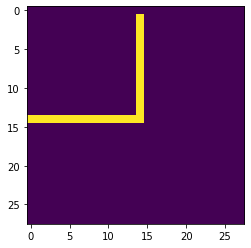

In [14]:
img3 = np.zeros(shape=(height,width))

#left horizontal line
rr_left_3, cc_left_3 = draw.line_nd((middle_height, 0), (middle_height, middle_width))  
img3[rr_left_3, cc_left_3] = strength

#right horizontal line
rr_right_3, cc_right_3 = draw.line_nd((middle_height, middle_width), (0, middle_width))  
img3[rr_right_3, cc_right_3] = strength

plt.imshow(img3)
plt.show()

In [17]:
vr3 = []
vp3 = []
contrast3 = []
rsync3 = []

for i in range(100):
    print('\nSIMULATION', i)
    sim3 = Simulation(stimulus=img3, filters=filters, total_connect_strength=0.13)
    voltage3, recovery3, firings3 = sim3.run(length=1000, verbose=True)

    img3_coord1 = (rr_left_3[-12]+1) * width + cc_left_3[-12]
    img3_coord2 = (rr_left_3[-4]+1) * width + cc_left_3[-4]
    img3_coord3 = (rr_right_3[4]+1) * width + cc_right_3[4] + width*height*2 + 1
    
    vp3_12 = Measure([firings3[img3_coord1], firings3[img3_coord2]], 'victor_purpura').dissimilarity()['mean']
    vp3_23 = Measure([firings3[img3_coord2], firings3[img3_coord3]], 'victor_purpura').dissimilarity()['mean']
    vp3.append(vp3_23 - vp3_12)
    print('victor_purpura', vp3_12, vp3_23)

    vr3_12 = Measure([firings3[img3_coord1], firings3[img3_coord2]], 'van_rossum').dissimilarity()['mean']
    vr3_23 = Measure([firings3[img3_coord2], firings3[img3_coord3]], 'van_rossum').dissimilarity()['mean']
    vr3.append(vr3_23 - vr3_12)
    print('van_rossum', vr3_12, vr3_23)
    
    contrast3_12 = Measure([firings3[img3_coord1], firings3[img3_coord2]], 'spike_contrast').dissimilarity()
    contrast3_23 = Measure([firings3[img3_coord2], firings3[img3_coord3]], 'spike_contrast').dissimilarity()
    contrast3.append(contrast3_23 - contrast3_12)
    print('contrast', contrast3_12, contrast3_23)
    
    rsync3_12 = Measure(firings3[[img3_coord1, img3_coord2]], 'rsync').dissimilarity()
    rsync3_23 = Measure(firings3[[img3_coord3, img3_coord2]], 'rsync').dissimilarity()
    rsync3.append(rsync3_23 - rsync3_12)
    print('rsync', rsync3_12, rsync3_23)
    
print('\nRESULTS')
print('victor purpura', np.mean(vp3), np.median(vp3))
print('van_rossum', np.mean(vr3), np.median(vr3))
print('contrast', np.mean(contrast3), np.median(contrast3))
print('rsync', np.mean(rsync3), np.median(rsync3))


SIMULATION 0
Simulated 100 ms of braintime in 0.15348689999996168 s of computer time.
Simulated 200 ms of braintime in 0.2534379999999601 s of computer time.
Simulated 300 ms of braintime in 0.35101750000012544 s of computer time.
Simulated 400 ms of braintime in 0.44156450000014047 s of computer time.
Simulated 500 ms of braintime in 0.5139585000001716 s of computer time.
Simulated 600 ms of braintime in 0.6085779000000002 s of computer time.
Simulated 700 ms of braintime in 0.6912654000000202 s of computer time.
Simulated 800 ms of braintime in 0.762617900000123 s of computer time.
Simulated 900 ms of braintime in 0.852677900000117 s of computer time.
Simulation took 0.9316664000000401 s
victor_purpura 2.2580000000000036 2.1860000000000044
van_rossum 1.87703818121405 1.7795337438005487
contrast 0.571124763705104 0.4368000000000001
rsync 0.48949710725411666 0.47177320095183406

SIMULATION 1
Simulated 100 ms of braintime in 0.13271289999988767 s of computer time.
Simulated 200 ms of b

Simulated 400 ms of braintime in 0.283627099999876 s of computer time.
Simulated 500 ms of braintime in 0.35669510000002447 s of computer time.
Simulated 600 ms of braintime in 0.4221863999998732 s of computer time.
Simulated 700 ms of braintime in 0.48853589999998803 s of computer time.
Simulated 800 ms of braintime in 0.5577776000000085 s of computer time.
Simulated 900 ms of braintime in 0.6246209999999337 s of computer time.
Simulation took 0.7119519999998829 s
victor_purpura 3.184000000000003 6.207000000000006
van_rossum 2.659683254225118 5.160834177289721
contrast 0.4883950617283951 0.6039094650205761
rsync 0.48872291567196413 0.47563018810448565

SIMULATION 10
Simulated 100 ms of braintime in 0.09460320000016509 s of computer time.
Simulated 200 ms of braintime in 0.1781364000000849 s of computer time.
Simulated 300 ms of braintime in 0.25656950000006873 s of computer time.
Simulated 400 ms of braintime in 0.3588035000000218 s of computer time.
Simulated 500 ms of braintime in 0

Simulated 700 ms of braintime in 0.49603419999994003 s of computer time.
Simulated 800 ms of braintime in 0.568031400000109 s of computer time.
Simulated 900 ms of braintime in 0.6362587000000985 s of computer time.
Simulation took 0.6996475000000828 s
victor_purpura 7.211000000000007 17.156000000000006
van_rossum 6.002510830954599 14.56763506198019
contrast 0.5744644965424186 0.6408999777233237
rsync 0.5063504073718772 0.4698193806008264

SIMULATION 19
Simulated 100 ms of braintime in 0.07856199999991986 s of computer time.
Simulated 200 ms of braintime in 0.145391699999891 s of computer time.
Simulated 300 ms of braintime in 0.21283569999991414 s of computer time.
Simulated 400 ms of braintime in 0.280195699999922 s of computer time.
Simulated 500 ms of braintime in 0.3613493999998809 s of computer time.
Simulated 600 ms of braintime in 0.42893789999993714 s of computer time.
Simulated 700 ms of braintime in 0.4920372999999927 s of computer time.
Simulated 800 ms of braintime in 0.55

victor_purpura 13.161000000000007 2.1620000000000026
van_rossum 11.203777615415309 1.7614067096607735
contrast 0.5107692307692306 0.42399999999999993
rsync 0.5002229192872951 0.49228686305079206

SIMULATION 28
Simulated 100 ms of braintime in 0.08017359999985274 s of computer time.
Simulated 200 ms of braintime in 0.14938449999999648 s of computer time.
Simulated 300 ms of braintime in 0.2167891999999938 s of computer time.
Simulated 400 ms of braintime in 0.2860074000000168 s of computer time.
Simulated 500 ms of braintime in 0.35917909999989206 s of computer time.
Simulated 600 ms of braintime in 0.42323209999995015 s of computer time.
Simulated 700 ms of braintime in 0.48683459999983825 s of computer time.
Simulated 800 ms of braintime in 0.5579336999999214 s of computer time.
Simulated 900 ms of braintime in 0.6233032999998613 s of computer time.
Simulation took 0.6911682999998447 s
victor_purpura 12.176999999999994 5.2130000000000045
van_rossum 10.345076892455523 4.336578153710276

Simulated 100 ms of braintime in 0.08171539999989363 s of computer time.
Simulated 200 ms of braintime in 0.15035729999999603 s of computer time.
Simulated 300 ms of braintime in 0.2173949000000448 s of computer time.
Simulated 400 ms of braintime in 0.28777790000003733 s of computer time.
Simulated 500 ms of braintime in 0.3598283999999694 s of computer time.
Simulated 600 ms of braintime in 0.42329799999993156 s of computer time.
Simulated 700 ms of braintime in 0.4876329999999598 s of computer time.
Simulated 800 ms of braintime in 0.562817399999858 s of computer time.
Simulated 900 ms of braintime in 0.62763219999988 s of computer time.
Simulation took 0.6907438999999158 s
victor_purpura 6.212999999999999 2.201000000000007
van_rossum 5.136400593274496 1.750599581067748
contrast 0.5807291666666666 0.5604338842975207
rsync 0.4907537903053598 0.5112247269346968

SIMULATION 38
Simulated 100 ms of braintime in 0.08198349999997845 s of computer time.
Simulated 200 ms of braintime in 0.14

Simulated 500 ms of braintime in 0.3827502999999979 s of computer time.
Simulated 600 ms of braintime in 0.4506390999999894 s of computer time.
Simulated 700 ms of braintime in 0.5244764000001396 s of computer time.
Simulated 800 ms of braintime in 0.593375000000151 s of computer time.
Simulated 900 ms of braintime in 0.6589229000001069 s of computer time.
Simulation took 0.720553000000109 s
victor_purpura 16.153000000000006 9.267000000000003
van_rossum 13.677595429605823 7.588134303437438
contrast 0.6351456815816858 0.7096198277672757
rsync 0.46492076730608867 0.5025533576653298

SIMULATION 47
Simulated 100 ms of braintime in 0.08076600000003964 s of computer time.
Simulated 200 ms of braintime in 0.15304900000000998 s of computer time.
Simulated 300 ms of braintime in 0.21937879999995857 s of computer time.
Simulated 400 ms of braintime in 0.28666580000003705 s of computer time.
Simulated 500 ms of braintime in 0.3522917000000234 s of computer time.
Simulated 600 ms of braintime in 0

Simulated 800 ms of braintime in 0.6512273000000732 s of computer time.
Simulated 900 ms of braintime in 0.717439000000013 s of computer time.
Simulation took 0.7890798000000814 s
victor_purpura 15.153999999999993 7.225000000000009
van_rossum 12.884770338801987 6.010355576026897
contrast 0.6173513358230392 0.6007304882737408
rsync 0.5142439673123698 0.5128434826371415

SIMULATION 56
Simulated 100 ms of braintime in 0.09408099999996011 s of computer time.
Simulated 200 ms of braintime in 0.18610830000011447 s of computer time.
Simulated 300 ms of braintime in 0.2614356999999927 s of computer time.
Simulated 400 ms of braintime in 0.3280131999999867 s of computer time.
Simulated 500 ms of braintime in 0.3925059999999121 s of computer time.
Simulated 600 ms of braintime in 0.4583890999999767 s of computer time.
Simulated 700 ms of braintime in 0.5211492999999336 s of computer time.
Simulated 800 ms of braintime in 0.6059933000001365 s of computer time.
Simulated 900 ms of braintime in 0.7

Simulated 100 ms of braintime in 0.10682930000007218 s of computer time.
Simulated 200 ms of braintime in 0.28948749999995016 s of computer time.
Simulated 300 ms of braintime in 0.401991100000032 s of computer time.
Simulated 400 ms of braintime in 0.5032071000000542 s of computer time.
Simulated 500 ms of braintime in 0.6169927000000826 s of computer time.
Simulated 600 ms of braintime in 0.704610300000013 s of computer time.
Simulated 700 ms of braintime in 0.8053757000000132 s of computer time.
Simulated 800 ms of braintime in 0.89423110000007 s of computer time.
Simulated 900 ms of braintime in 0.9858266999999614 s of computer time.
Simulation took 1.084801299999981 s
victor_purpura 11.176000000000004 1.2510000000000023
van_rossum 9.386023826626959 1.0913386728093557
contrast 0.5849056603773585 0.5457003785830179
rsync 0.4936353934219465 0.5109803921568629

SIMULATION 66
Simulated 100 ms of braintime in 0.10171420000006037 s of computer time.
Simulated 200 ms of braintime in 0.199

Simulated 500 ms of braintime in 0.35251719999996567 s of computer time.
Simulated 600 ms of braintime in 0.4159130999998979 s of computer time.
Simulated 700 ms of braintime in 0.4915118999999777 s of computer time.
Simulated 800 ms of braintime in 0.5764461999999639 s of computer time.
Simulated 900 ms of braintime in 0.6520393999999214 s of computer time.
Simulation took 0.7321185000000696 s
victor_purpura 0.29400000000000714 5.260999999999995
van_rossum 0.7282227306597974 4.489305838679355
contrast 0.5397727272727273 0.5895460224906289
rsync 0.48800892359174575 0.4915039655136334

SIMULATION 75
Simulated 100 ms of braintime in 0.08320529999991777 s of computer time.
Simulated 200 ms of braintime in 0.15015900000003057 s of computer time.
Simulated 300 ms of braintime in 0.22096209999995153 s of computer time.
Simulated 400 ms of braintime in 0.2896068000000014 s of computer time.
Simulated 500 ms of braintime in 0.3652538999999706 s of computer time.
Simulated 600 ms of braintime i

Simulated 800 ms of braintime in 0.8093645000001288 s of computer time.
Simulated 900 ms of braintime in 0.9123563000000559 s of computer time.
Simulation took 1.0209795000000668 s
victor_purpura 9.185000000000006 5.248000000000003
van_rossum 7.710047927852849 4.473297585416158
contrast 0.6069775720897117 0.5749610158164402
rsync 0.5132285908253323 0.5172373847365737

SIMULATION 84
Simulated 100 ms of braintime in 0.11450769999987642 s of computer time.
Simulated 200 ms of braintime in 0.21743469999978515 s of computer time.
Simulated 300 ms of braintime in 0.33009870000000774 s of computer time.
Simulated 400 ms of braintime in 0.46008449999999357 s of computer time.
Simulated 500 ms of braintime in 0.5912532999998348 s of computer time.
Simulated 600 ms of braintime in 0.6868187999998554 s of computer time.
Simulated 700 ms of braintime in 0.820345499999803 s of computer time.
Simulated 800 ms of braintime in 0.9511234999999942 s of computer time.
Simulated 900 ms of braintime in 1.1

Simulated 100 ms of braintime in 0.1779868000000988 s of computer time.
Simulated 200 ms of braintime in 0.37365040000008776 s of computer time.
Simulated 300 ms of braintime in 0.8026981000000433 s of computer time.
Simulated 400 ms of braintime in 0.9480763000001389 s of computer time.
Simulated 500 ms of braintime in 1.1345323000000462 s of computer time.
Simulated 600 ms of braintime in 1.3173639000001458 s of computer time.
Simulated 700 ms of braintime in 1.4888412000000244 s of computer time.
Simulated 800 ms of braintime in 1.6231164000000717 s of computer time.
Simulated 900 ms of braintime in 1.7227214000001823 s of computer time.
Simulation took 1.801369200000181 s
victor_purpura 20.19400000000001 20.117
van_rossum 17.02952874886304 17.12085391854274
contrast 0.681396484375 0.582275390625
rsync 0.4987692706309108 0.5149630781189274

SIMULATION 94
Simulated 100 ms of braintime in 0.08852299999989555 s of computer time.
Simulated 200 ms of braintime in 0.16869619999988572 s of

In [129]:
import pandas as pd
import scipy as sp
import seaborn as sns

sns.set(style='whitegrid', color_codes=True)
sns.set_context('poster')

dark_color = sns.xkcd_rgb['charcoal grey']
light_color = sns.xkcd_rgb['cloudy blue']

In [107]:
firings = []
data = {'0': (vp1, vr1, contrast1), '90': (vp3, vr3, contrast3), '135': (vp2, vr2, contrast2)}

for key, val in data.items():
    df = pd.DataFrame()
    df['synchrony difference'] = val[0] + val[1] + val[2]
    df['degree'] = key 
    df['metric'] = ['victor purpura']*len(val[0]) + ['van rossum']*len(val[1]) + ['spike contrast']*len(val[2]) 
    firings.append(df)
    
firings = pd.concat(firings)
#firings = firings.loc[firings['metric'] != 'spike contrast']

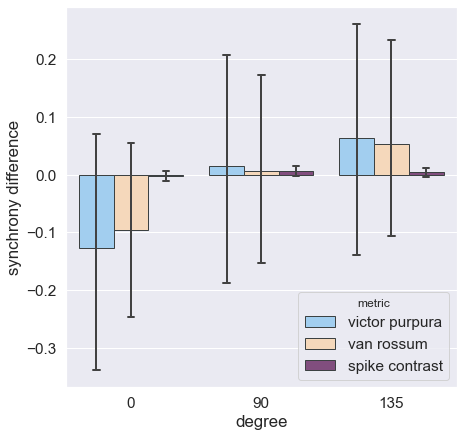

In [108]:
sns.set(font_scale=1.4)
plt.figure(figsize=(7, 7))

sns.barplot(x='degree', y='synchrony difference', hue='metric', data=firings, capsize=.05, errwidth=2,
                linewidth=1, estimator=np.mean, edgecolor=dark_color,
                order=['0', '90', '135'],
                palette={
                        'van rossum': sns.xkcd_rgb['light peach']
                        ,'victor purpura': sns.xkcd_rgb['light blue']
                        ,'spike contrast': sns.xkcd_rgb['light eggplant']
                        })

In [109]:
firings = pd.DataFrame()
degrees = ['0'] * len(vp1) + ['90'] * len(vp3) + ['135'] * len(vp2)
firings['degree'] = degrees
firings['victor purpura'] = vp1 + vp3 + vp2
firings['van rossum'] = vr1 + vr3 + vr2
firings['spike contrast'] = contrast1 + contrast3 + contrast2

Text(0, 0.5, 'right synch - left synch')

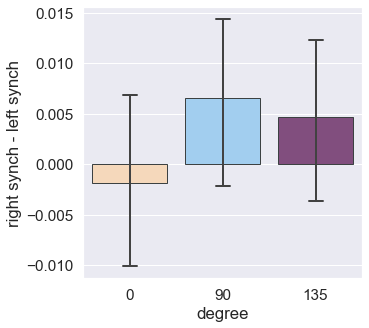

In [115]:
sns.set(font_scale=1.4)
plt.figure(figsize=(5, 5))
sns.barplot(x=firings['degree'], y=firings['spike contrast'], capsize=.15, errwidth=2,
                linewidth=1, estimator=np.mean, edgecolor=dark_color,
                order=['0', '90', '135'],
                palette={
                        '0': sns.xkcd_rgb['light peach'],
                        '90': sns.xkcd_rgb['light blue'],
                        '135': sns.xkcd_rgb['light eggplant']
                        })
plt.ylabel('right synch - left synch')

In [168]:
sp.stats.kruskal(contrast1, contrast2, contrast3)

KruskalResult(statistic=1.4618579581861053, pvalue=0.48146151459352615)

In [170]:
sp.stats.kruskal(contrast1, contrast2), sp.stats.kruskal(contrast1, contrast3), sp.stats.kruskal(contrast2, contrast3)

(KruskalResult(statistic=0.821561146475128, pvalue=0.36472411837925145),
 KruskalResult(statistic=1.3010101477593705, pvalue=0.2540287909242033),
 KruskalResult(statistic=0.07016383989608303, pvalue=0.7910983787474068))

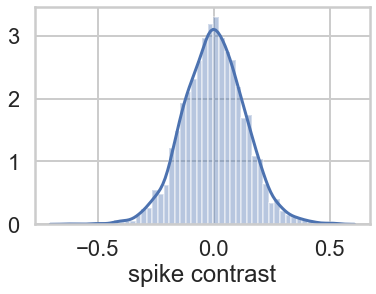

In [188]:
sns.distplot(firings['spike contrast'])

In [185]:
stat, p = sp.stats.shapiro(firings['spike contrast'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)


In [212]:
# normality test
result = sp.stats.anderson(firings['spike contrast'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.022
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data looks normal (fail to reject H0)


In [232]:
data = firings['spike contrast']
posdata = data[data > 0]
bcdata, lam = sp.stats.boxcox(posdata)

x = np.empty_like(data)
x[data > 0] = bcdata
x[data < 0] = -1/lam

contrast_norm, lam = sp.stats.boxcox(firings['spike contrast']+1)

In [253]:
sp.stats.kruskal(contrast1, contrast2), sp.stats.kruskal(contrast1, contrast3), sp.stats.kruskal(contrast2, contrast3)

(KruskalResult(statistic=0.821561146475128, pvalue=0.36472411837925145),
 KruskalResult(statistic=1.3010101477593705, pvalue=0.2540287909242033),
 KruskalResult(statistic=0.07016383989608303, pvalue=0.7910983787474068))

In [254]:
sp.stats.kruskal(contrast1, contrast2, contrast3)

KruskalResult(statistic=1.4618579581861053, pvalue=0.48146151459352615)